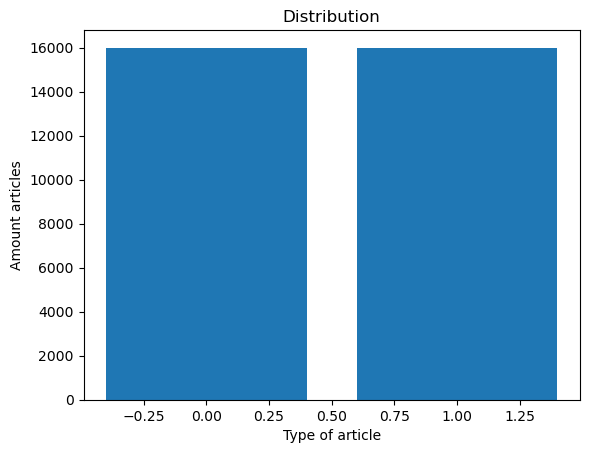

Common words in clickbait articles :
[('things', 997), ('people', 926), ('know', 803), ('make', 760), ('based', 607), ('actually', 596), ('times', 508), ('like', 491), ('best', 470), ('new', 442), ('need', 403), ('life', 389), ('every', 332), ('ever', 330), ('get', 317), ('time', 312), ('everyone', 301), ('one', 296), ('zodiac', 295), ('love', 294)]

Common words in non-clickbait articles :
[('new', 802), ('us', 638), ('dead', 349), ('dies', 347), ('killed', 347), ('uk', 309), ('president', 299), ('kills', 277), ('wins', 270), ('australian', 270), ('first', 269), ('says', 269), ('world', 265), ('obama', 264), ('two', 250), ('police', 241), ('china', 235), ('court', 229), ('iraq', 228), ('british', 223)]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Dataset we use for our experiments 
df = pd.read_csv('clickbait_data.csv')  

# Distribution 
class_distribution = df['clickbait'].value_counts()
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Type of article')
plt.ylabel('Amount articles')
plt.title('Distribution')
plt.show()

# Store all clickbait and non-clickbait items
clickbait_articles = df[df['clickbait'] == 1]['headline']  
non_clickbait_articles = df[df['clickbait'] == 0]['headline']

# Removal of empty words and symbols
stop_words = set(stopwords.words('english'))  
punctuation = set(string.punctuation)
clickbait_words = [word.lower() for article in clickbait_articles for word in word_tokenize(article) if word.lower() not in stop_words and word.lower() not in punctuation and word.isalpha()]
non_clickbait_words = [word.lower() for article in non_clickbait_articles for word in word_tokenize(article) if word.lower() not in stop_words and word.lower() not in punctuation and word.isalpha()]

# Counting the most frequent words in each class
clickbait_word_freq = Counter(clickbait_words)
non_clickbait_word_freq = Counter(non_clickbait_words)

print("Common words in clickbait articles :")
print(clickbait_word_freq.most_common(20))

print("\nCommon words in non-clickbait articles :")
print(non_clickbait_word_freq.most_common(20))
